In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [433]:
# Load the dataset into a Pandas DataFrame
data=pd.read_csv('SEER Breast Cancer Dataset.csv')
df=pd.DataFrame(data)
df.head()

Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0  Married (including common law)         NaN       T2      N3      IIIC   
1  Married (including common law)         NaN       T2      N2      IIIA   
2  Married (including common law)         NaN       T2      N1       IIB   
3                        Divorced         NaN       T1      N1       IIA   
4  Married (including common law)         NaN       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately differentiated; Grade II  Regional          45        Positive   
2     Poorly differentiated; Grade III  Regional          25        Positive   
3  Moderately differentiated; Grade II  Regional          19        Positive   
4  Moderately differentiated; Grade II  Regional          35        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      19                     11   
1            Positive                      25                      9   
2            Positive                       4                      1   
3            Positive                      26                      1   
4            Positive                      21                      5   

   Survival Months Status  
0                1  Alive  
1                2  Alive  
2                2   Dead  
3                2   Dead  
4                3   Dead

In [434]:
data.info() #find about null values, datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [435]:
df.isnull().sum()  #find missing values


Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [436]:
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True) # Remove columns with missing value

In [437]:
print("Number of duplicates:", df.duplicated().sum())
#remove duplicates
df.drop_duplicates()

Number of duplicates: 1


Age                                              Race   \
0      43  Other (American Indian/AK Native, Asian/Pacifi...   
1      47  Other (American Indian/AK Native, Asian/Pacifi...   
2      67                                              White   
3      46                                              White   
4      63                                              White   
...   ...                                                ...   
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status T Stage  N Stage 6th Stage  \
0     Married (including common law)       T2      N3      IIIC   
1     Married (including common law)       T2      N2      IIIA   
2     Married (including common law)       T2      N1       IIB   
3                           Divorced       T1      N1       IIA   
4     Married (including common law)       T2      N2      IIIA   
...                              ...      ...     ...       ...   
4019  Married (including common law)       T1      N1       IIA   
4020  Married (including common law)       T1      N2      IIIA   
4021                        Divorced       T1      N1       IIA   
4022  Married (including common law)       T1      N1       IIA   
4023                        Divorced       T1      N1       IIA   

                                    Grade   A Stage  Tumor Size  \
0     Moderately differentiated; Grade II  Regional          40   
1     Moderately differentiated; Grade II  Regional          45   
2        Poorly differentiated; Grade III  Regional          25   
3     Moderately differentiated; Grade II  Regional          19   
4     Moderately differentiated; Grade II  Regional          35   
...                                   ...       ...         ...   
4019         Well differentiated; Grade I  Regional          10   
4020     Poorly differentiated; Grade III  Regional           9   
4021  Moderately differentiated; Grade II  Regional           9   
4022  Moderately differentiated; Grade II  Regional           9   
4023  Moderately differentiated; Grade II  Regional           8   

     Estrogen Status Progesterone Status  Regional Node Examined  \
0           Positive            Positive                      19   
1           Positive            Positive                      25   
2           Positive            Positive                       4   
3           Positive            Positive                      26   
4           Positive            Positive                      21   
...              ...                 ...                     ...   
4019        Positive            Positive                      19   
4020        Negative            Negative                      13   
4021        Negative            Negative                       4   
4022        Positive            Positive                      14   
4023        Positive            Positive                       1   

      Reginol Node Positive  Survival Months Status  
0                        11                1  Alive  
1                         9                2  Alive  
2                         1                2   Dead  
3                         1                2   Dead  
4                         5                3   Dead  
...                     ...              ...    ...  
4019                      1              107  Alive  
4020                      5              107  Alive  
4021                      2              107  Alive  
4022                      2              107  Alive  
4023                      1              107  Alive  

[4023 rows x 15 columns]

In [438]:
#Label encoding for a categorical feature
label_encoder = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

Status
0    3408
1     616
Name: count, dtype: int64


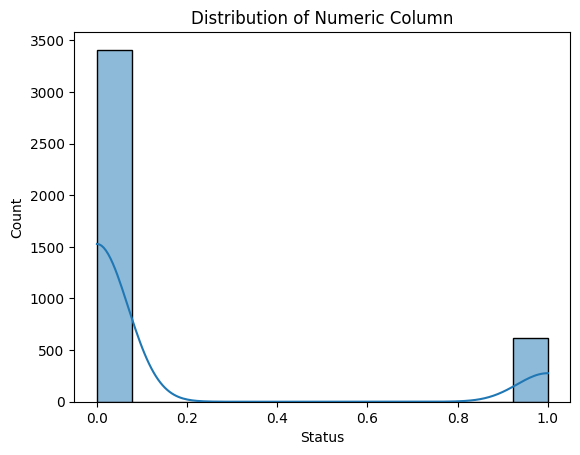

In [439]:
# Create a histogram
print(df['Status'].value_counts()) 
sns.histplot(df['Status'], kde=True)
plt.title('Distribution of Numeric Column')
plt.show()

In [440]:
# Display summary statistics
summary_stats = df.describe()
print(summary_stats)

               Age        Race   Marital Status     T Stage       N Stage  \
count  4024.000000  4024.000000     4024.000000  4024.000000  4024.000000   
mean     53.972167     1.775845        1.371272     0.784791     0.438370   
std       8.963134     0.564465        1.063637     0.765531     0.693479   
min      30.000000     0.000000        0.000000     0.000000     0.000000   
25%      47.000000     2.000000        1.000000     0.000000     0.000000   
50%      54.000000     2.000000        1.000000     1.000000     0.000000   
75%      61.000000     2.000000        1.000000     1.000000     1.000000   
max      69.000000     2.000000        4.000000     3.000000     2.000000   

         6th Stage        Grade      A Stage   Tumor Size  Estrogen Status  \
count  4024.000000  4024.000000  4024.000000  4024.000000      4024.000000   
mean      1.321819     0.690358     0.977137    30.473658         0.933151   
std       1.266624     1.016418     0.149485    21.119696         0.2497

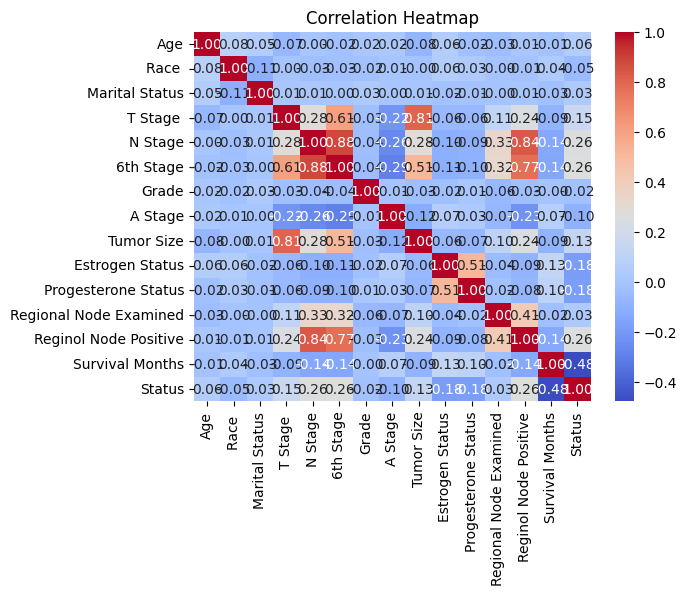

In [441]:
# Create a correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [442]:
#Split data
X=df.drop(columns='Status')
Y=df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)
#Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [443]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=4,random_state=1)
clf.fit(X_train,y_train) #Training process
y_pred=clf.predict(X_test) #Predicting Process
 #Evaluation Process
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

  # Generate a classification report (includes precision, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       682
           1       0.86      0.51      0.64       123

    accuracy                           0.91       805
   macro avg       0.89      0.75      0.80       805
weighted avg       0.91      0.91      0.90       805



In [447]:
logreg = LogisticRegression(random_state=1)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
 #Evaluation Process
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

  # Generate a classification report (includes precision, recall, F1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       682
           1       0.83      0.41      0.55       123

    accuracy                           0.90       805
   macro avg       0.87      0.70      0.74       805
weighted avg       0.89      0.90      0.88       805



Text(0.5, 427.9555555555555, 'Predicted label')

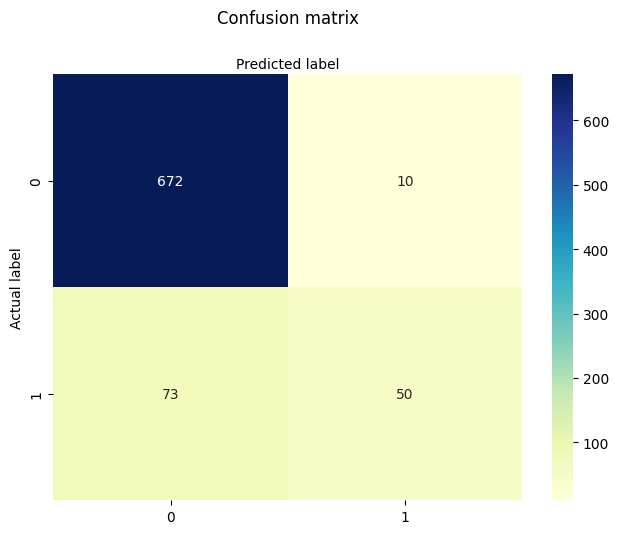

In [445]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')